# Upper limit

In this post lecture quiz, we will practice calculation of upper limit. There are three tasks in this assignment.


## Part 1. Simple counting experiments

To calculate upper limit of the signal events with 90% Confidence, we can use the formula 
$C = 1 - \frac{\sum_i^{n_{obs}} P(i|n_{sup}+n_b)}{\sum_i^{n_{obs}} P(i|n_b)}$,
where $n_{obs}$ is the observed yields,
$n_b$ is the predicted background yields, and
$n_{sup}$ is the upper limit of signal yields with 
$C$ confidence.



In [74]:
# Example: We expect two background events and observed three events.
# Calculate upper limit of the signal events with 90% Confdence.
import scipy
import numpy
K=3 # observed three events
B=2 # expected background events.

print("Prepare array of observed events:",numpy.arange(K+1))

Sup=5.0
min=5.0
for i in numpy.linspace(4.9,5.0,20): # scan upper limit of signal events
    num=sum(scipy.stats.poisson.pmf(numpy.arange(K+1),i+B))
    den=sum(scipy.stats.poisson.pmf(numpy.arange(K+1),B))
    C = 1-num/den
    if(abs(C-0.9)<min):
        min=abs(C-0.9)
        Sup=i
    print(i,1-num/den)

print("Upper limit: %.2f"%Sup)

Prepare array of observed events: [0 1 2 3]
4.9 0.8983464985360994
4.905263157894737 0.8986848134720559
4.910526315789474 0.8990221228865349
4.915789473684211 0.8993584291824163
4.921052631578948 0.8996937347598113
4.926315789473684 0.9000280420160486
4.931578947368421 0.9003613533456598
4.936842105263158 0.9006936711403662
4.942105263157895 0.9010249977890643
4.947368421052632 0.901355335677812
4.9526315789473685 0.9016846871898155
4.957894736842105 0.9020130547054154
4.963157894736843 0.9023404406020739
4.968421052631579 0.9026668472543606
4.973684210526316 0.9029922770339405
4.978947368421053 0.9033167323095603
4.984210526315789 0.9036402154470359
4.989473684210527 0.9039627288092398
4.994736842105263 0.9042842747560876
5.0 0.9046048556445269
Upper limit: 4.93


In [75]:
# Task 1: 
# We expect four background events and observed two events.
# What is the 95% C.L. upper limit of signal events?
# Implement your code in this cell
Sup=5.0
min=5.0
for i in numpy.linspace(5.8,6.2,20): # scan upper limit of signal events
    num=sum(scipy.stats.poisson.pmf(numpy.arange(K+1),i+B))
    den=sum(scipy.stats.poisson.pmf(numpy.arange(K+1),B))
    C = 1-num/den
    if(abs(C-0.95)<min):
        min=abs(C-0.95)
        sup=i
    print(i,1-num/den)
UpperLimit = sup
print("Upper limit: %.2f"%UpperLimit)

5.8 0.9434427278365941
5.821052631578947 0.9442335645558123
5.842105263157895 0.9450142047111243
5.863157894736842 0.9457847630656508
5.88421052631579 0.9465453534229649
5.905263157894737 0.9472960886280131
5.926315789473684 0.9480370805682302
5.947368421052632 0.9487684401748389
5.968421052631579 0.9494902774243312
5.989473684210527 0.9502027013401277
6.010526315789473 0.9509058199944058
6.031578947368421 0.9515997405100959
6.052631578947368 0.9522845690630384
6.073684210526316 0.9529604108842973
6.094736842105263 0.9536273702626262
6.11578947368421 0.9542855505470815
6.136842105263158 0.9549350541497776
6.157894736842105 0.9555759825487821
6.178947368421053 0.9562084362911427
6.2 0.9568325149960472
Upper limit: 5.99


## Part 2. Multiple bin Counting Experiments

To calculate upper limit of total signal yields based on observed distributions and given signal and background distributions, we will compute the p-value of null hypothesis test statistics.

## Part 2a. pseudo-data preparation
We will continue using the Gaussian signal and Exponential background from previous post lecture quiz as examples.


2.0 [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159. 161. 163. 165. 167. 169. 171. 173. 175. 177. 179.]
Nmasses: 2020
Nmasses (after selection): 1983


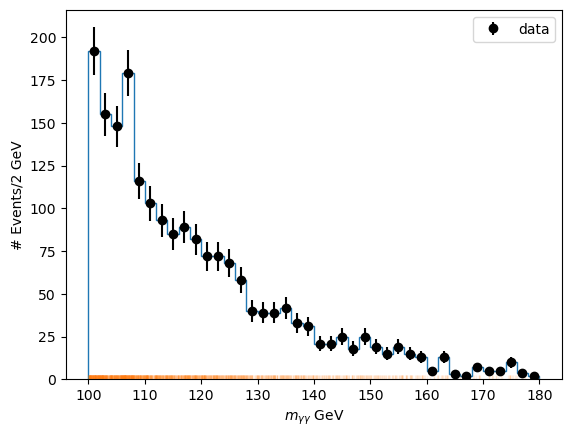

In [76]:
#
# Create a Gaussian signal with Expoential background 
# Calculate logLikelihood ratio distribution given null hypothesis
#
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import poisson
from matplotlib import pyplot as plt

# First, let's create sinal yield of 50 and background yield of 2000
# We will focus on mass range between 100 GeV and 180 GeV
# The bin width of histogram is chosen to be similar to the expected signal width
#
Ns = 20
Nb = 2000
xmin = 100
xmax = 180
nbins= 40
bins = np.linspace(xmin, xmax, nbins+1)
binCenter = 1/2 *(bins[1:] + bins[:-1])
binWidth = bins[1]-bins[0]

print (binWidth, binCenter)

xr = (xmin, xmax)  # xrange

#set random seed to guarantee reproducibility
np.random.seed(seed=6)

# Truth parameter for this exercise
MH_truth = 125.5
Width_truth=2
Alpha_truth=20
fs_truth=Ns/(Ns+Nb)

# signal is normal distribution
xdata = norm.rvs(loc=MH_truth, scale=Width_truth, size=Ns)

# background is exponential distribution
ydata = expon.rvs(loc=xmin, scale=Alpha_truth, size=Nb)

# combine signal and background
masses = np.append(xdata, ydata)

print('Nmasses:', len(masses))
# apply event selection
masses = masses[(xr[0] < masses) & (masses < xr[1])]
print('Nmasses (after selection):', len(masses))

mass_hist, xe = np.histogram(masses, bins=nbins, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')
plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

plt.legend()
plt.show()

In [77]:
# First we have to define PDF models
def norm_S(x,MH,Width):
    return norm.pdf(x,MH,Width)

def norm_B(x,alpha):
    ainv=1./alpha
    r = expon.pdf(ainv*(x-xmin))
    c = r*ainv/(1.-expon.pdf(ainv*(xmax-xmin)))
    #print(x,alpha,r,c)
    return c 

@np.vectorize
def prob(x,MH,Width,fs,alpha):
    pB = norm_B(x,alpha)
    pS = norm_S(x,MH,Width)
    pTotal = fs*pS+(1.-fs)*pB
    return pTotal


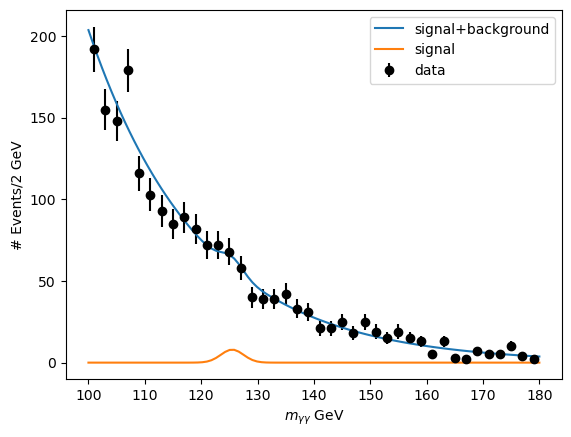

In [78]:
#
# Let's take a look of the agreement between our model and generated data
#
xspace = np.linspace(xmin,xmax,100)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))
fig =  plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')

plt.plot(xspace,(Ns+Nb)*binWidth*prob(xspace,MH_truth,Width_truth,Ns/(Ns+Nb),Alpha_truth),label='signal+background')
plt.plot(xspace,Ns*binWidth*norm.pdf(xspace,MH_truth,Width_truth),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

## Part 2b. Discovery test

First, let's perform the discovery test on pseudo-data. We will compute significance based on simple S/sqrt(B) method and compare to the Frequentist -2logLikelihood calculation method.



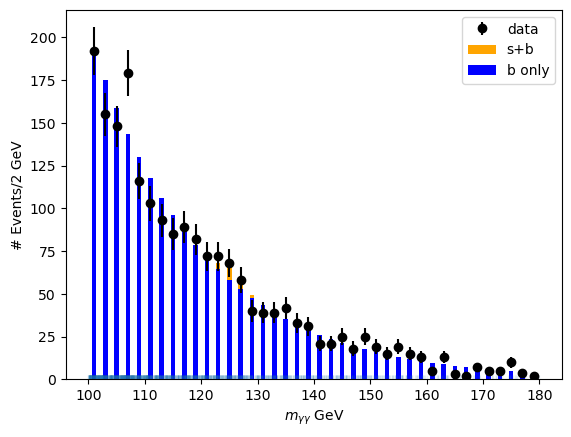

In [79]:
# Instead of plotting continous function, we can create histogram templates based
# on signal PDF and background. Eacn bin of the histogram is the expected yields
# from the PDF. When we normalize the PDF to expected yields, we have to take 
# into account the binWidth.
#

#
# The predicted yields are calculated as function of binCenter
#
Ns_predict = Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
Ns_and_Nb  = Ns_predict+Nb_predict


#print("binCenter:",binCenter)
#print("Ns_predict:",Ns_predict)
#print("Nb_predict:",Nb_predict)
#print("Total_predict:",Ns_and_Nb)
#print("data:", mass_hist)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))
fig =  plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')
plt.bar(binCenter, Ns_and_Nb, color='orange', label='s+b')
plt.bar(binCenter, Nb_predict, color='b', label='b only')
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);

#plt.plot(xspace,(Ns+Nb)*prob(xspace,125.5,2,Ns/(Ns+Nb),20),label='signal+background')
#plt.plot(xspace,Ns*norm.pdf(xspace,126.5,2),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

### Part 2b-1: Calculate p-value using simple counting S/sqrt(B)

In [80]:
# The significance is defined as S/sqrt(B)
#    a. without mass selection
#    b. with mass selection
# We will show that the significance is improved after applying mass selection 

# Total predicted yields without any mass selection
Ns_all=sum(Ns_predict)
Nb_all=sum(Nb_predict)
Signifcance_all= Ns_all/Nb_all**.5

In [81]:
# Calculate significance from predicted signal and background
# Applying mass selection: mass > 120 and mass < 130
# We can create a mask based on binCenter array and apply the mask to predicted signal/bkg
# Significance is computed as Ns/sqrt(Nb)
#
bin_mask= np.logical_and(binCenter>120, binCenter<130) #write your code here
Ns_pass= sum(Ns_predict[bin_mask]) #write your code here
Nb_pass= sum(Nb_predict[bin_mask]) #write your code here
Signifcance_pass= Ns_pass/(Nb_pass)**.5 #Write your code here

#print("binCenter:",binCenter)
#print("binMask:",bin_mask)

print("Ns_all: %.2f Nb_pass: %.2f S/sqrt(B): %.2f"%(Ns,Nb_all,Signifcance_all))
print("Ns_pass: %.2f Nb_pass: %.2f S/sqrt(B): %.2f"%(Ns_pass,Nb_pass,Signifcance_pass))

Ns_all: 20.00 Nb_pass: 1999.17 S/sqrt(B): 0.45
Ns_pass: 19.77 Nb_pass: 294.78 S/sqrt(B): 1.15


### Part 2b-2: Calculate p-value using log likelihood ratio 

For the discovery test, we calculate p-value of the data given background-only model using log likelihood ratio as test statistics
$ t_0= -2 log \frac{H(B)}{H(S+B)} $,
where $H(B)$ is background-only (null) hypothesis,

and $H(S+B)$ is signal and background (alternative) hypothesis.

This test is to evaluate p-value to reject background-only model.


In [82]:
#
# Step1. Define binned log likelihood
#
def neg_binned_logL(pars,data_hist):
    MH=pars[0]
    Width=pars[1]
    fs=pars[2]
    alpha=pars[3]
    N=sum(data_hist)
    Ns_predict = N*fs*binWidth*norm_S(binCenter,MH,Width)
    Nb_predict = N*(1.-fs)*binWidth*norm_B(binCenter,alpha)
    N_predict  = Ns_predict+Nb_predict

    output= -2*sum( [ n_obs*np.log(n_predict) - n_predict for n_obs, n_predict in zip(data_hist, N_predict) ] )
    return output

In [83]:
#
# Step2. Calculate test statistics of the data
# 
parB=[MH_truth, Width_truth, 0, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

t0 = neg_binned_logL(parB,mass_hist) - neg_binned_logL(parSandB,mass_hist)

print("data test statistics:",t0)

data test statistics: 2.442061027204545


In [84]:
#
# Generate 10K toy experiments from background only hypothesis
# calculate test statistics from each experiment
#
from tqdm import tqdm
Ntoys=10000
h0_test=np.zeros(Ntoys)
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h0_test[i]=t0

   
# print(h0_test)

100%|██████████| 10000/10000 [00:25<00:00, 394.43it/s]


2.442061027204545


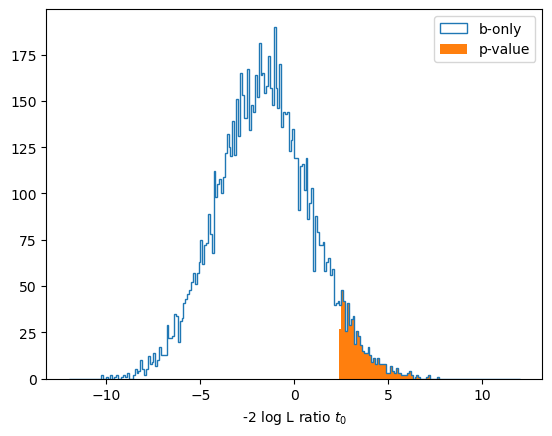

In [85]:
# 
# Let's visualize the distribution
#  p-value is the shaded area with -2 log likelihood ratio greater or equal to the observed
#

t_data = neg_binned_logL(parB,mass_hist) - neg_binned_logL(parSandB,mass_hist)
print(t_data)

plt.hist(h0_test,bins=240,range=[-12,12],histtype='step',label='b-only')
plt.hist(h0_test[h0_test>t_data],bins=240,range=[-12,12],label='p-value')

plt.xlabel("-2 log L ratio $t_0$")
plt.legend()
plt.show()

In [86]:
# Step 3
# p-value is the fraction of toy experiments with test statistics >= observed test statistics
# We can compare this results to the simple counting method S/sqrt(B)
#

# Calculate p-value
pvalue = len(h0_test[h0_test>t_data])/Ntoys #write your code here

# one-tailed
n_sigma_one_tailed = norm.ppf(1-pvalue) #write your code here

print("p-value:",pvalue)
print("significance (1 tailed): %.2f"%n_sigma_one_tailed)
print("significance (counting): %.2f"%Signifcance_pass)

p-value: 0.0564
significance (1 tailed): 1.59
significance (counting): 1.15


## Part 3: Upper limit calculation

The discovery test in Part2b is less than $3\sigma$. There is not enough significance to claim discovery, we will go ahead to compute the upper limit of signal.

For the upper limit calculation, we calculate p-value of the observed data given scaled signal + background model using log likelihood ratio as test statistics
$ t_\mu= -2 log \frac{H(\mu S+B)}{H(S+B)} $,

where $H(\mu S+B)$ is signal scaled by a factor of $\mu$ + background hypothesis,

and $H(S+B)$ is the default signal and background hypothesis.

The $\mu$ is known as signal strength.

The goal of upper limit calculation is to identify the maximum value of signal strength $\mu$ which can be rejected with a given Confidence Level C.

The implementation is to scan a list of signal strength $\mu$, compute the corresponding p-value and identify the one which is the most close to 1-C.


In [87]:
Ntoys=5000
h0_test=np.zeros(Ntoys)
def pvalueWithMu(mu):
    fs_mu=mu*Ns/(mu*Ns+Nb)

    Ns_predict = mu*Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
    Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
    Ns_and_Nb  = Ns_predict+Nb_predict

    parB_mu=[MH_truth, Width_truth, fs_mu, Alpha_truth]
    parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

    
    for i in range(Ntoys):
        toy_hist = [ np.random.poisson(nb) for nb in zip(Ns_and_Nb) ]
        t0 = neg_binned_logL(parB_mu,toy_hist) - neg_binned_logL(parSandB,toy_hist)
        h0_test[i]=t0[0]

    t_data = neg_binned_logL(parB_mu,mass_hist) - neg_binned_logL(parSandB,mass_hist)
    # Calculate p-value to reject muS+B hypothesis
    beta = len(h0_test[h0_test>t_data])/Ntoys #write your code here
    return beta

t_{\mu=1.10}=-0.05
mu_upperlimit %.2f with p-value= 0.5628


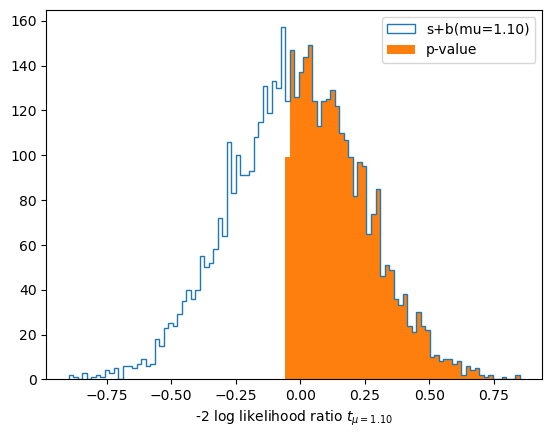

In [88]:
# Example: let's compute p-value corresponding to signal strength mu=1.1
mu=1.1

fs_mu=mu*Ns/(mu*Ns+Nb)
parB_mu=[MH_truth, Width_truth, fs_mu, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

beta = pvalueWithMu(mu)
t_data = neg_binned_logL(parB_mu,mass_hist) - neg_binned_logL(parSandB,mass_hist)
print("t_{\mu=%.2f}=%.2f"%(mu,t_data))

print("mu_upperlimit %.2f with p-value=",beta)

Xmin=np.min(h0_test)
Xmax=np.max(h0_test)

plt.hist(h0_test,bins=100,range=[Xmin,Xmax],histtype='step',label='s+b(mu=%.2f)'%mu)
plt.hist(h0_test[h0_test>t_data],bins=100,range=[Xmin,Xmax],label='p-value')

plt.xlabel("-2 log likelihood ratio $t_{\mu=%.2f}$"%mu)
plt.legend()
plt.show()

t_{\mu=2.00}=0.79
mu_upperlimit %.2f with p-value= 0.1752


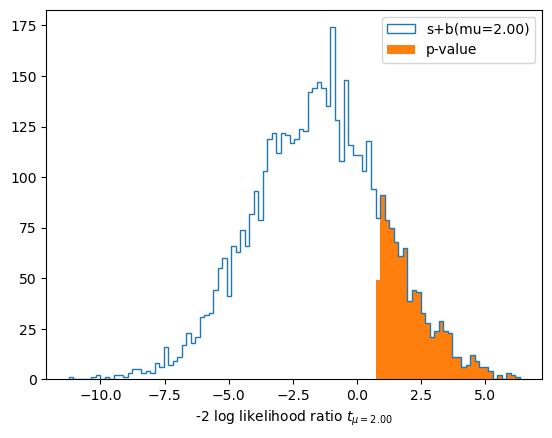

In [89]:
# Task 2: Compute p-value for higher signal strength mu=2.0
mu=2.0

fs_mu=mu*Ns/(mu*Ns+Nb)
parB_mu=[MH_truth, Width_truth, fs_mu, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

beta = pvalueWithMu(mu)
t_data = neg_binned_logL(parB_mu,mass_hist) - neg_binned_logL(parSandB,mass_hist)

print("t_{\mu=%.2f}=%.2f"%(mu,t_data))
print("mu_upperlimit %.2f with p-value=",beta)

Xmin=np.min(h0_test)
Xmax=np.max(h0_test)

plt.hist(h0_test,bins=100,range=[Xmin,Xmax],histtype='step',label='s+b(mu=%.2f)'%mu)
plt.hist(h0_test[h0_test>t_data],bins=100,range=[Xmin,Xmax],label='p-value')

plt.xlabel("-2 log likelihood ratio $t_{\mu=%.2f}$"%mu)
plt.legend()
plt.show()

In [116]:
# Task 3 From the previous two tests, we can observe that the 
# higher the signal strength, the smaller the p-value. 
# You are going to scan mu value and identify the one most close to 0.05.
# This is the upper limit of the signal strength at 95% Confidence Level.
#
mu_high=3
mu_mid = 2.5
mu_low = 2
beta_min=10
CL=0.95

while (abs(beta_min - 0.05) > 0.0005):
    mu_mid = (mu_low + mu_high) / 2
    beta_min = pvalueWithMu(mu_mid)

    print("\mu = %.4f" % mu_mid)
    print("p-value = %.4f" % beta_min)

    print(mu_low, mu_mid, mu_high)

    if (beta_min > 0.05):
        mu_low = mu_mid
    else:
        mu_high = mu_mid

mu_upperlimit = mu_mid
print("\n mu_upperlimit=%.4f p-value=%.4f"%(mu_upperlimit,beta_min))


\mu = 2.5000
p-value = 0.0648
2 2.5 3
\mu = 2.7500
p-value = 0.0364
2.5 2.75 3
\mu = 2.6250
p-value = 0.0502
2.5 2.625 2.75

 mu_upperlimit=2.6250 p-value=0.0502


t_{\mu=2.62}=2.63
mu_upperlimit 2.62 with p-value= 0.05


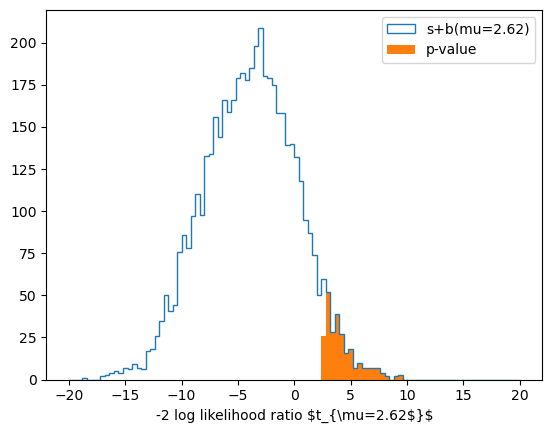

In [118]:
fs_mu=mu_upperlimit*Ns/(mu_upperlimit*Ns+Nb)
parB_mu=[MH_truth, Width_truth, fs_mu, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

beta=pvalueWithMu(mu_upperlimit)
t_data = neg_binned_logL(parB_mu,mass_hist) - neg_binned_logL(parSandB,mass_hist)
print("t_{\mu=%.2f}=%.2f" % (mu_upperlimit,t_data))

print("mu_upperlimit %.2f with p-value= %.2f" % (mu_upperlimit, beta))

#plt.hist(h0_test,bins=100,histtype='step',label='b-only')
plt.hist(h0_test,bins=100,range=[-20,20],histtype='step',label='s+b(mu=%.2f)'%mu_upperlimit)
plt.hist(h0_test[h0_test>t_data],bins=100,range=[-20,20],label='p-value')

#plt.show()
#plt.hist(t_test,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.axis([100,180,0,0.05])
plt.xlabel("-2 log likelihood ratio $t_{\mu=%.2f$}$"%mu_upperlimit)
plt.legend()
plt.show()